<a href="https://colab.research.google.com/github/abhi1ranjan/ML-Algorithm_Practise/blob/main/Bootstrapping_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Performing Bootstrapping without SKLearn library

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap



In [5]:

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Parameters
n_bootstrap_samples = 100  # Number of bootstrap samples
test_size = 0.2  # Proportion of data for testing in each bootstrap sample
model = LogisticRegression(max_iter=200)

# List to store accuracy for each bootstrap sample
accuracies = []

# Bootstrapping loop
for i in range(n_bootstrap_samples):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

    # Generate bootstrap sample indices for the training set
    bootstrap_indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bootstrap = X_train[bootstrap_indices]
    y_bootstrap = y_train[bootstrap_indices]

    # Train the model on the bootstrap sample
    model.fit(X_bootstrap, y_bootstrap)

    # Test the model on the test set and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate average accuracy and standard deviation
average_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

print(f"Estimated Model Accuracy: {average_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_dev_accuracy:.4f}")


Estimated Model Accuracy: 0.9653
Standard Deviation of Accuracy: 0.0336


Performing Bootstrapping using SKLearn library

In [10]:

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Parameters
n_bootstrap_samples = 100  # Number of bootstrap samples
test_size = 0.2  # Proportion of data for testing in each bootstrap sample
# model = LogisticRegression(max_iter=200)


# Reduce dimensionality to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


# List to store accuracy for each bootstrap sample
accuracies = []

# Bootstrapping loop
for i in range(n_bootstrap_samples):
    # Create a bootstrap sample from the original data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

    # Apply PCA to reduce to 2D on training and testing sets
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Resample the training data with replacement to create a bootstrap sample
    X_bootstrap, y_bootstrap = resample(X_train, y_train, replace=True)

    # Reinitialize the model to ensure it trains from scratch with 2D data
    model = LogisticRegression(max_iter=200)
    model.fit(X_bootstrap, y_bootstrap)

    # # Train the model on the bootstrap sample
    # model.fit(X_bootstrap, y_bootstrap)

    # Test the model on the test set and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate average accuracy and standard deviation
average_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

print(f"Estimated Model Accuracy: {average_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_dev_accuracy:.4f}")


Estimated Model Accuracy: 0.9607
Standard Deviation of Accuracy: 0.0341


### Visualizing the classification

In [11]:

# # Load dataset
# data = load_iris()
# X, y = data.data, data.target

# # Parameters
# n_bootstrap_samples = 100  # Number of bootstrap samples
# test_size = 0.2  # Proportion of data for testing in each bootstrap sample
# model = LogisticRegression(max_iter=200)

# # List to store accuracy for each bootstrap sample
# accuracies = []

# # Bootstrapping loop
# for i in range(n_bootstrap_samples):
#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

#     # Apply PCA to reduce to 2D on training and testing sets
#     pca = PCA(n_components=2)
#     X_train_pca = pca.fit_transform(X_train)
#     X_test_pca = pca.transform(X_test)

#     # Generate bootstrap sample indices for the training set
#     bootstrap_indices = np.random.choice(len(X_train_pca), size=len(X_train_pca), replace=True)
#     X_bootstrap = X_train_pca[bootstrap_indices]
#     y_bootstrap = y_train[bootstrap_indices]

#     # Train the model on the bootstrap sample
#     model.fit(X_bootstrap, y_bootstrap)

#     # Test the model on the test set and calculate accuracy
#     y_pred = model.predict(X_test_pca)
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies.append(accuracy)

# # Calculate average accuracy and standard deviation
# average_accuracy = np.mean(accuracies)
# std_dev_accuracy = np.std(accuracies)

# print(f"Estimated Model Accuracy: {average_accuracy:.4f}")
# print(f"Standard Deviation of Accuracy: {std_dev_accuracy:.4f}")

# Plotting decision boundaries of the last trained model
# Generate a grid of points to plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on each point in the grid using the last trained model
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

# Plot decision boundaries by coloring the background
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)

# Plot the original data points with true labels, reduced to 2D with PCA
X_pca = pca.transform(X)  # Transform the entire dataset for visualization
for i, color in zip(np.unique(y), cmap_bold):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=data.target_names[i], color=color, edgecolor='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundaries with Bootstrapping on PCA-Reduced Iris Data')
plt.legend()
plt.show()


ValueError: X has 2 features, but LogisticRegression is expecting 4 features as input.

Estimated Model Accuracy: 0.9580
Standard Deviation of Accuracy: 0.0332


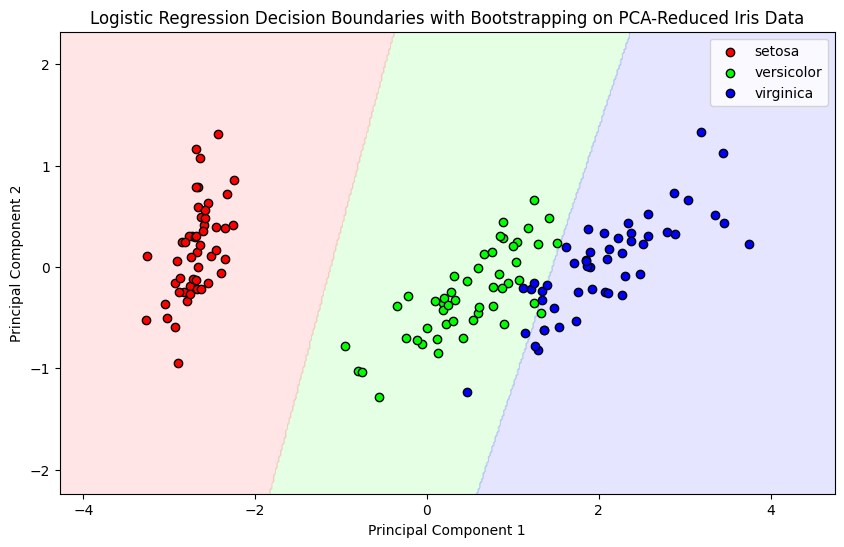

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Parameters
n_bootstrap_samples = 100  # Number of bootstrap samples
test_size = 0.2  # Proportion of data for testing in each bootstrap sample

# List to store accuracy for each bootstrap sample
accuracies = []

# Bootstrapping loop
for i in range(n_bootstrap_samples):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

    # Apply PCA to reduce to 2D on training and testing sets
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Generate bootstrap sample indices for the training set
    bootstrap_indices = np.random.choice(len(X_train_pca), size=len(X_train_pca), replace=True)
    X_bootstrap = X_train_pca[bootstrap_indices]
    y_bootstrap = y_train[bootstrap_indices]

    # Reinitialize the model to ensure it trains from scratch with 2D data
    model = LogisticRegression(max_iter=200)
    model.fit(X_bootstrap, y_bootstrap)

    # Test the model on the test set and calculate accuracy
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calculate average accuracy and standard deviation
average_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

print(f"Estimated Model Accuracy: {average_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_dev_accuracy:.4f}")

# Plotting decision boundaries of the last trained model
# Generate a grid of points to plot decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on each point in the grid using the last trained model
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']

# Plot decision boundaries by coloring the background
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)

# Plot the original data points with true labels, reduced to 2D with PCA
X_pca = pca.transform(X)  # Transform the entire dataset for visualization
for i, color in zip(np.unique(y), cmap_bold):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=data.target_names[i], color=color, edgecolor='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundaries with Bootstrapping on PCA-Reduced Iris Data')
plt.legend()
plt.show()
